Data Understanding and Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
df = pd.read_csv("risk_factors_cervical_cancer.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [4]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


EXPLORATORY DATA ANALYSIS

In [6]:
# determining the null vlaues and handling "?"

df.replace('?', np.nan)
df = df.apply(pd.to_numeric, errors='coerce')

df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

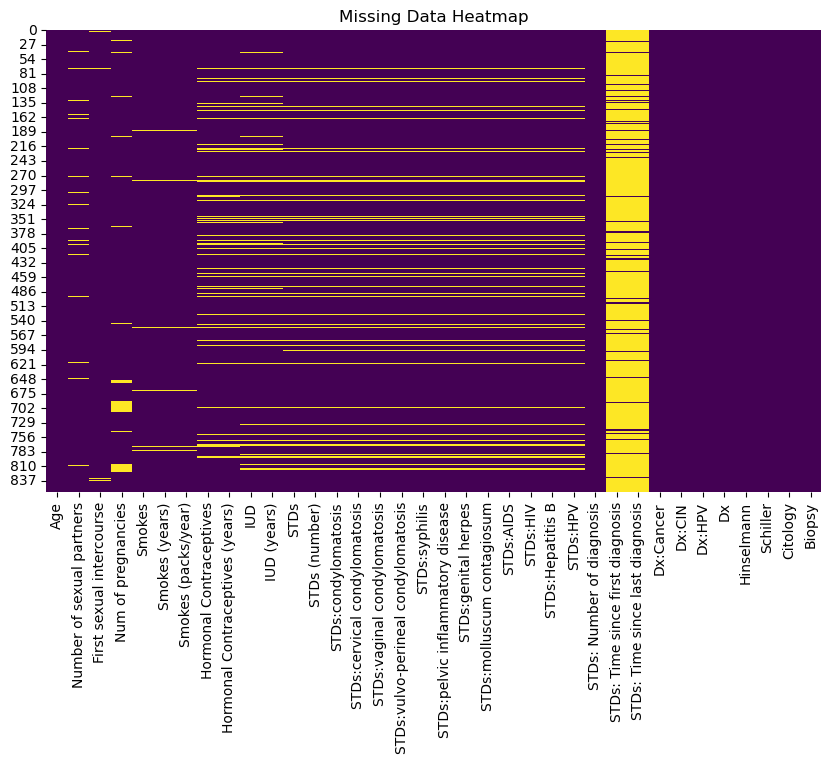

In [7]:
# Visualizing the missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [8]:
df['Biopsy'].value_counts()

Biopsy
0    803
1     55
Name: count, dtype: int64

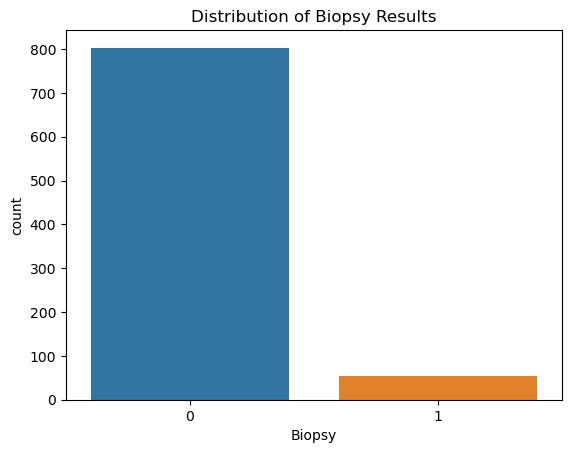

In [9]:
# Plotting the distribution of the target variable

sns.countplot(x='Biopsy', data=df)
plt.title('Distribution of Biopsy Results')
plt.show()

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


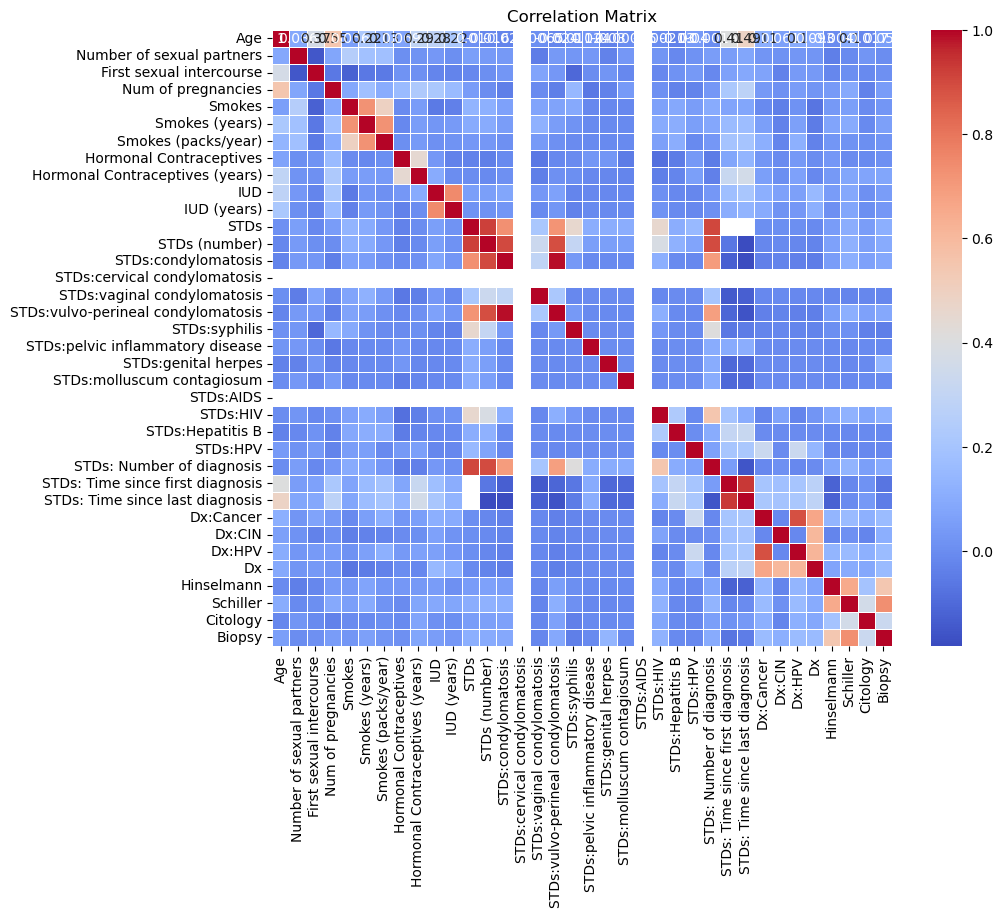

In [10]:
#  Correlation Matrix Plot

correlation_matrix = df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [11]:
#Show correlation of each feature with the target variable

print(correlation_matrix['Biopsy'].sort_values(ascending=False))

Biopsy                                1.000000
Schiller                              0.733204
Hinselmann                            0.547417
Citology                              0.327466
Dx:Cancer                             0.160905
Dx:HPV                                0.160905
Dx                                    0.157607
STDs:genital herpes                   0.132526
STDs:HIV                              0.126880
Dx:CIN                                0.113172
STDs                                  0.109099
STDs (number)                         0.098347
STDs: Number of diagnosis             0.097449
STDs:vulvo-perineal condylomatosis    0.088902
STDs:condylomatosis                   0.086390
Hormonal Contraceptives (years)       0.079388
Smokes (years)                        0.062044
Age                                   0.055956
IUD                                   0.053194
Num of pregnancies                    0.046416
IUD (years)                           0.033275
Smokes       

In [12]:
numerical_columns = [
    'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 
    'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs', 
    'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
    'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
    ]


for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
# Filling missing values with the median 
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [14]:
# Handling missing values for categorical variables

df = pd.get_dummies(data = df, columns = ['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


In [15]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.201241,0.446278,2.035331,0.444604,0.155012,0.051282,...,0.001166,0.001166,0.0,0.020979,0.001166,0.002331,0.087413,4.177156,3.233100,0.064103
std,8.497948,1.644759,2.791883,1.400981,4.060623,2.210351,3.567040,1.814218,0.529617,0.220701,...,0.034139,0.034139,0.0,0.143398,0.034139,0.048252,0.302545,1.785156,1.818927,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000


c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

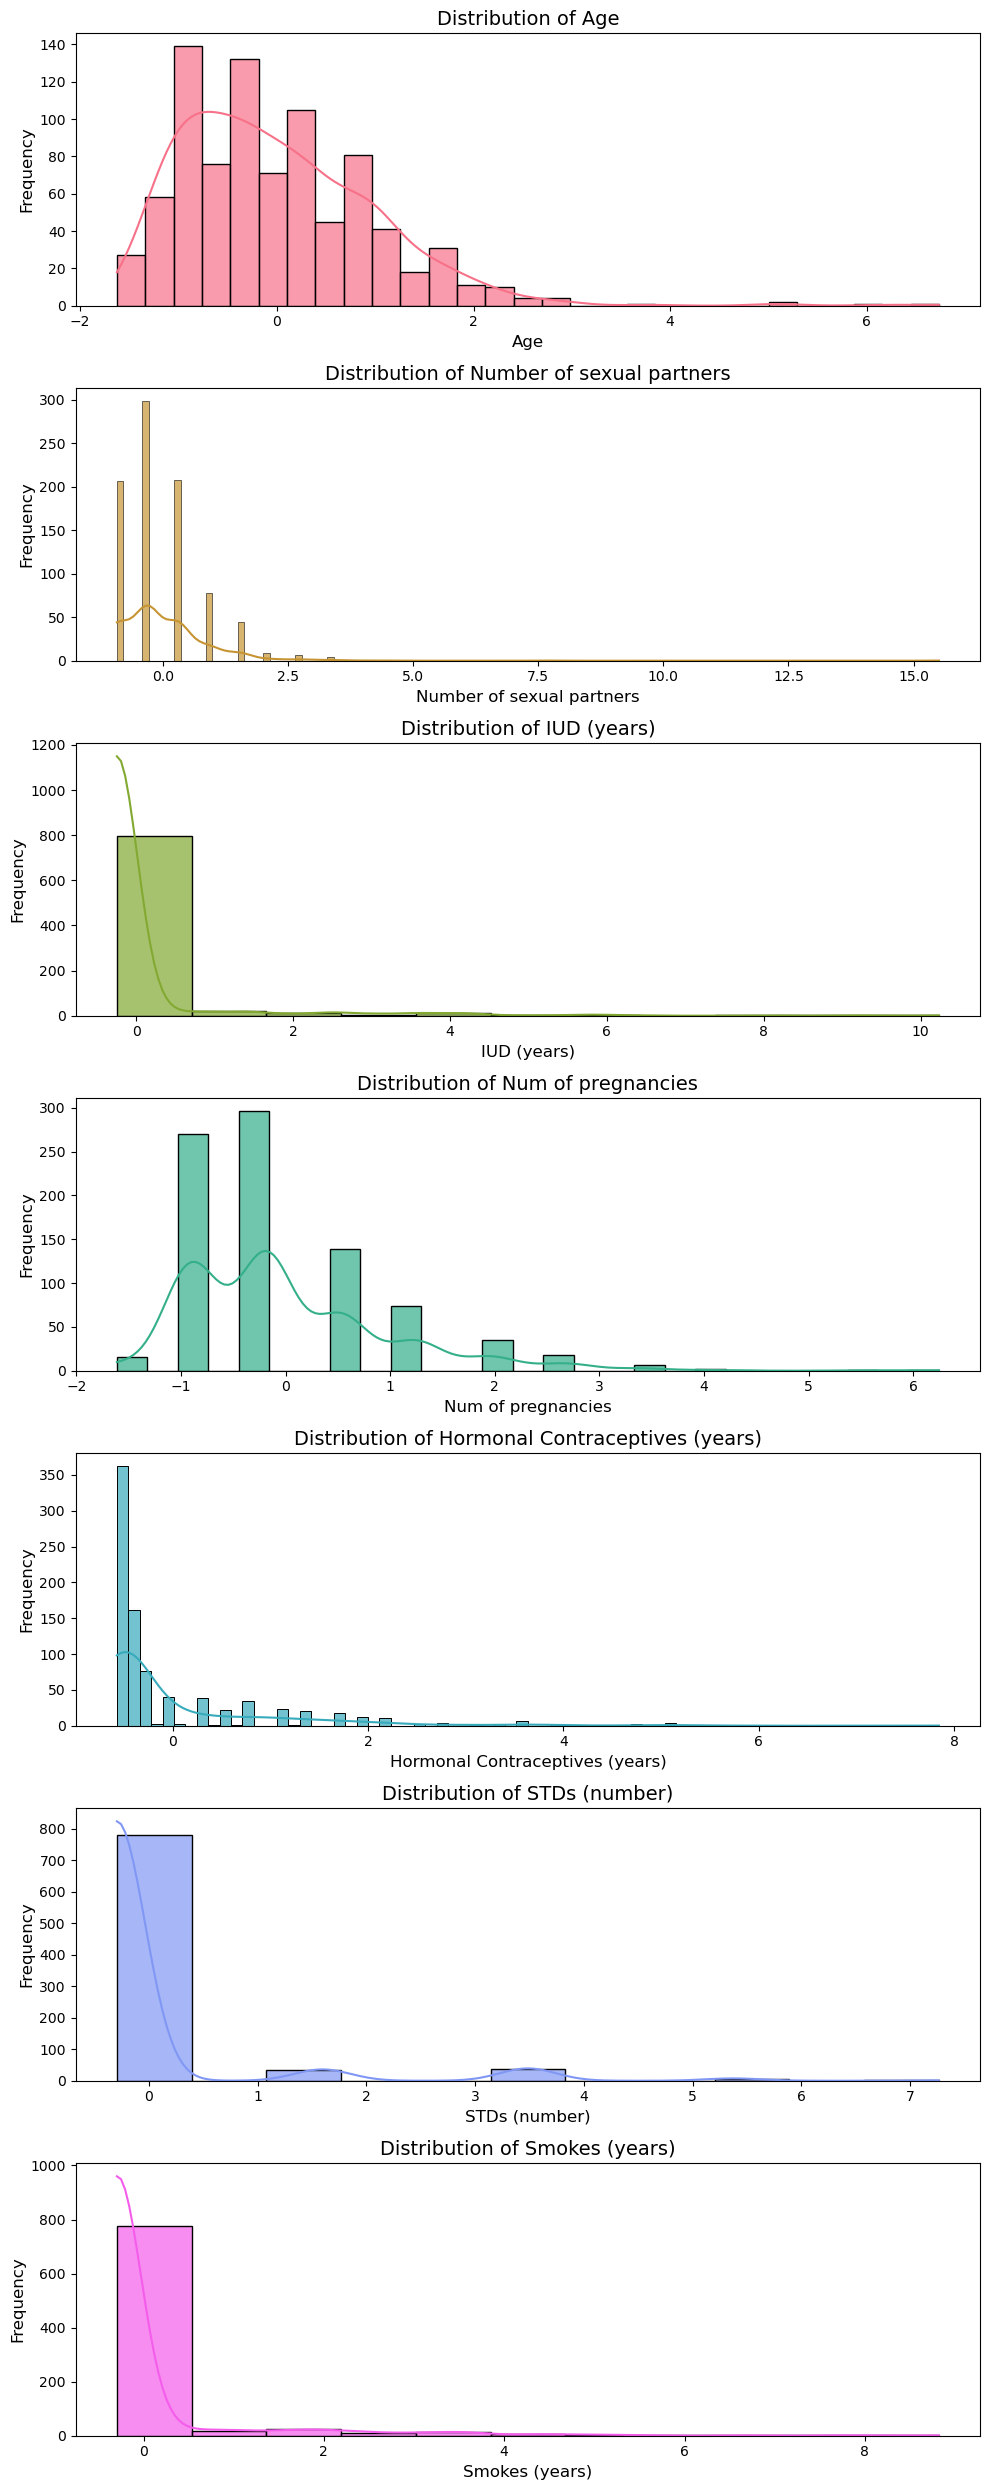

In [29]:
# Plotting the distribution of key features
key_features = ['Age', 'Number of sexual partners', 'IUD (years)', 'Num of pregnancies', 'Hormonal Contraceptives (years)', 'STDs (number)', 'Smokes (years)']
palette = sns.color_palette('husl', len(key_features))


# Plotting the distribution of key features

fig, axes = plt.subplots(len(key_features), 1, figsize=(10, 25))
color = sns.color_palette('husl', 1)[0]

for ax, key_feature, color in zip(axes, key_features, palette):
    sns.histplot(df[key_feature].dropna(), kde=True, ax=ax, color=color, alpha=0.7)
    ax.set_title(f'Distribution of {key_feature}', fontsize=14)
    ax.set_xlabel(key_feature, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)


plt.tight_layout()
plt.show()


FEATURE ENGINEERING

In [18]:
stds_columns = ['STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
    'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
    ]


df['STDs_count'] = df[stds_columns].sum(axis=1)


In [19]:
# Check for NaNs in STDs_count column
print("NaNs in STDs_count column after calculation:")
print(df['STDs_count'].isnull().sum())

NaNs in STDs_count column after calculation:
0


In [20]:
# Total Contraceptive Usage years
df['Total_contraceptive_usage_years'] = df['Hormonal Contraceptives (years)'] + df['IUD (years)']


In [21]:
df['Total_smoking'] = df['Smokes (years)'] * df['Smokes (packs/year)']

In [22]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Biopsy,STDs_count,Total_contraceptive_usage_years,Total_smoking
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.201241,0.446278,2.035331,0.444604,0.155012,0.051282,...,0.020979,0.001166,0.002331,0.087413,4.177156,3.233100,0.064103,7.720280,2.479935,7.029576
std,8.497948,1.644759,2.791883,1.400981,4.060623,2.210351,3.567040,1.814218,0.529617,0.220701,...,0.143398,0.034139,0.048252,0.302545,1.785156,1.818927,0.245078,3.989026,4.024119,56.857613
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,7.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,7.000000,0.500000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,7.000000,3.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,48.000000,30.000000,1369.000000


Normalization/Standardization (Normalizing Numerical Columns)

In [25]:
num_cols_to_scale = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 
    'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)',
    'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
    'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
    'STDs_count', 'Total_smoking', 'Total_contraceptive_usage_years']

for col in num_cols_to_scale:
    df[col]= pd.to_numeric(df[col], errors ='coerce')
    
scaler = StandardScaler()
df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

Feature Selection Using Random Forest

In [26]:
# Using Random Forest

X = df.drop('Biopsy', axis=1)
y = df['Biopsy']

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X,y)

RandomForestClassifier(random_state=42)

In [38]:
important = random_forest.feature_importances_


importances_feature = pd.DataFrame({'Feature': X.columns,'Importance': important })

# Sorting by importance

importances_feature = importances_feature.sort_values(by = 'Importance', ascending= False)
print(importances_feature)


                               Feature  Importance
44                          Schiller_0    0.168170
45                          Schiller_1    0.160386
0                                  Age    0.071596
41                        Hinselmann_1    0.070161
40                        Hinselmann_0    0.068341
2             First sexual intercourse    0.061298
47     Total_contraceptive_usage_years    0.045301
1            Number of sexual partners    0.043457
6      Hormonal Contraceptives (years)    0.041663
3                   Num of pregnancies    0.038726
43                          Citology_1    0.027772
42                          Citology_0    0.026494
7                          IUD (years)    0.012341
4                       Smokes (years)    0.011701
28                             IUD_0.0    0.010358
5                  Smokes (packs/year)    0.010255
46                          STDs_count    0.009114
48                       Total_smoking    0.009086
27         Hormonal Contracepti

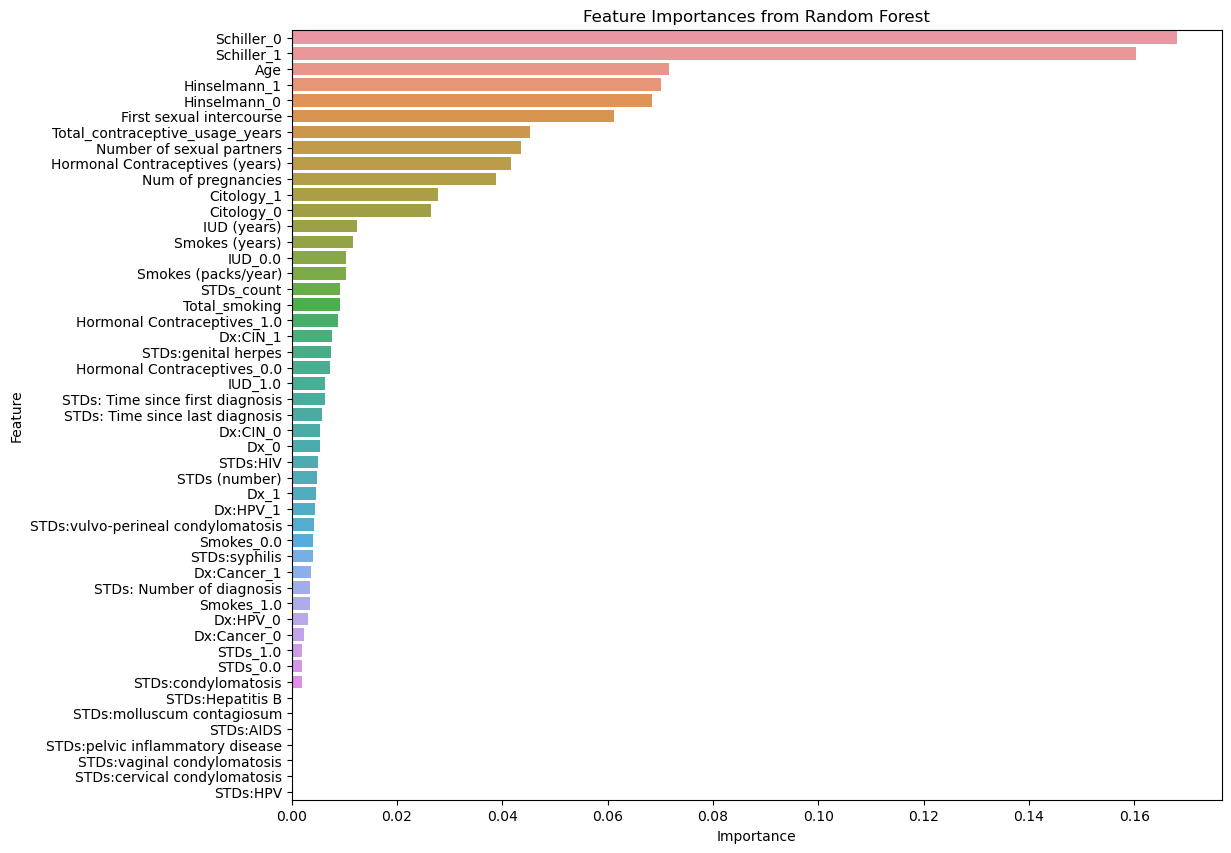

In [40]:
# Plotting feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data= importances_feature)
plt.title('Feature Importances from Random Forest')
plt.show()